In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
pwd

'C:\\Users\\willn\\SynergisticIT\\Data Science\\Association Rule'

In [14]:
movies_df = pd.read_csv('my_movies.csv')
movies_df.shape

(10, 15)

In [25]:
movies_df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [27]:
# no columns totals or row totals = 0, thus all rows and columns contain analyzable information
# the first 5 columns (indices 0:4) are not needed as dummy encoded columns are already created
# split off columns 6 onward (indicies 5:) for analysis into new df
movies_encoded_clean_df = movies_df.iloc[:, 5:]
movies_encoded_clean_df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [28]:
# import apriori and assocation_rules from mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [30]:
frequent_itemsets = apriori(movies_encoded_clean_df, min_support= 0.20, max_len = 4, use_colnames=True)
frequent_itemsets

C:\Users\willn\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


Support of an association rule is the percentage of groups that contain all of the items listed in that association rule. The percentage value is calculated from among all the groups that were considered.

Thus ---> 
- 60% of rows (transactions) contain 'Sixth Sense' 
- 70% of rows (transactions) contain  'Gladiator'
- 50% of rows (transactions) contain BOTH 'Gladiator' AND 'Sixth Sense'
- 20% of rows (transactions) contain BOTH 'LOT1' AND 'LOTR2'
- And so on for the other rows

In [31]:
frequent_itemsets.sort_values('support', ascending=False, inplace=True)
frequent_itemsets

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
10,0.6,"(Patriot, Gladiator)"
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
12,0.4,"(Patriot, Gladiator, Sixth Sense)"
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
5,0.2,(LOTR2)


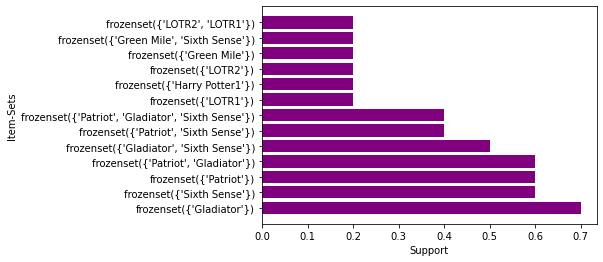

In [33]:
plt.barh(y=list(range(0,13)), width=frequent_itemsets.support[0:13], color='purple')
plt.yticks(list(range(0,13)), frequent_itemsets.itemsets[0:13], rotation =0)
plt.ylabel('Item-Sets')
plt.xlabel('Support')
plt.show()

In [34]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.sort_values('lift', ascending=True).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
6,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
11,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4


The Apriori algorithm can be broken down into a basic If ----> Then concept. IF a customer purchases item A THEN what is the liklihood they also purchase item B? The 'THEN' condition is broken down as a number as in, IF customer purchases bread THEN 60% chance they buy jam/jelly. Thats the jist of what we are trying to accomplish. The "IF" is referred to as the "antecedent(s)" and the "THEN", "Consequent(s)".

**Imporant to remember we are not looking for a causality, but rather a pattern of co-occurence**

There are 3 matrices that help to measure the association between antecedent(s) and consequent(s):
- Support
- Condifence
- Lift

**Support** is the frequency of item 1 or the combination of item1 and item2 : Its basically the frequency of the items which we have bought and what are the combination(s) of the frequency of the item we have bought.

**Confidence** tells us how often the items 1 & 2 occur together given the number of times item 1 occurs.

**Lift** is essentially the strength of any rule

In [43]:
data = [['T1', 'A', 'B','C'], ['T2', 'A', 'C', 'D'], ['T3', 'B', 'C', 'D'], ['T4', 'A', 'D', 'E'], ['T5', 'B', 'C', 'E']]
example_data = pd.DataFrame(data)
example_data

,0,1,2,3
0,T1,A,B,C
1,T2,A,C,D
2,T3,B,C,D
3,T4,A,D,E
4,T5,B,C,E


0   1  2  3
T1  A  B  C    1
T2  A  C  D    1
T3  B  C  D    1
T4  A  D  E    1
T5  B  C  E    1
dtype: int64

## Theortical Rules

In [48]:
cols1 = ['Values', 'Frequency/Support']
data3 = [['A', 3], ['B',3], ['C',4], ['D',3], ['E',2]]
value_support_table = pd.DataFrame(data3, columns = cols1)
value_support_table

,Values,Frequency/Support
0,A,3
1,B,3
2,C,4
3,D,3
4,E,2


In [46]:
cols = ['Rule', 'Support', 'Confidence', 'Lift', 'Supp_Num', 'Conf_Num', 'Lift_Num']
data1 = [['A==>D', '2/5', '2/3', '10/9', (2/5), (2/3), (10/9)], ['C==>A', '2/5', '2/4', '5/6', (2/5), (2/4), (5/6)], ['A==>C', '2/5', '2/3', '5/6',  (2/5), (2/3), (5/6)], ['B&C==>A', '1/5', '1/3', '5/9',  (1/5), (1/3), (5/9)]] 
rules_explanation_table = pd.DataFrame(data1, columns = cols)
rules_explanation_table

,Rule,Support,Confidence,Lift,Supp_Num,Conf_Num,Lift_Num
0,A==>D,2/5,2/3,10/9,0.4,0.666667,1.111111
1,C==>A,2/5,2/4,5/6,0.4,0.500000,0.833333
2,A==>C,2/5,2/3,5/6,0.4,0.666667,0.833333
3,B&C==>A,1/5,1/3,5/9,0.2,0.333333,0.555556


### Row 0 Analysis

-Row 0 Support ---> A & D appear together 2 times in all of our 5 transactions ---> 40% of the time

-Row 0 Confidence ----> A & D appear together 2 times and A appears in 3 total transactions ---> 66% of the time

-Row 0 Lift ----> (Rule Confidence/Benchmark Confidence)
   - Benchmark Confidence = (Support of Consequent(A=3)/Total_Number_Transactions(5); 3/6 = .6
   - Rule_Confidence(2/3 = 0.666667)/Benchmark_Confidence(.6)
   - Lift = (0.666667)/(0.6) =====> 1.1111111(Lift_num)
    
### Thus....
The rule of if A then D has a support of .4 which means in the COMBINATION of A and D appears in 40% of ALL of the transactions.

The rule of if A then D has a confidence value of 0.666667 which means that the COMBINATION of A and D appears in 67% of the transactions in which A was purchased.

The rule of if A then D has a lift value of 1.1111 which means that that there is a strong association for this rule. The lift value expresses that the presence of D give that A is present happens more often than would be expected. 
- (Confidence / (Expected/Benchmark Confidence)